In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [10]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize  import word_tokenize
# from nltk.stem  import porter

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

In [32]:
data = pd.read_csv(r"C:\Users\avina\Downloads\irish_Dataset.csv")


In [33]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [34]:
data.head()

,Sepal Length,sepal width,petal length,petal width,class label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,6.4,3.5,4.5,1.2,versicolor
3,5.1,3.5,1.4,0.2,Iris-setosa
4,4.9,3.0,1.4,0.2,Iris-setosa


In [36]:
data.shape

(24, 5)

In [43]:
data.rename(columns={"class label":'class'},inplace=True)

In [46]:
data.groupby('class').size()


class
Iris-setosa        16
Iris-versicolor     4
Iris-virginica      1
Setosa              2
versicolor          1
dtype: int64

Sepal Length       Axes(0.125,0.53;0.352273x0.35)
sepal width     Axes(0.547727,0.53;0.352273x0.35)
petal length       Axes(0.125,0.11;0.352273x0.35)
petal width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

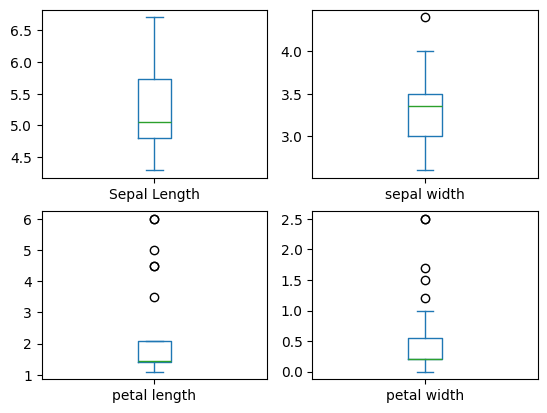

In [53]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)

array([[<Axes: title={'center': 'Sepal Length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

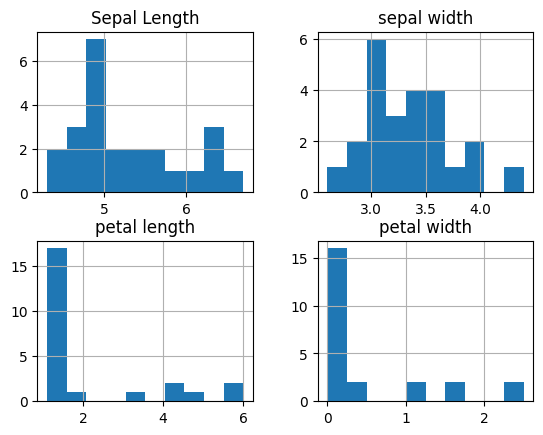

In [56]:
data.hist()


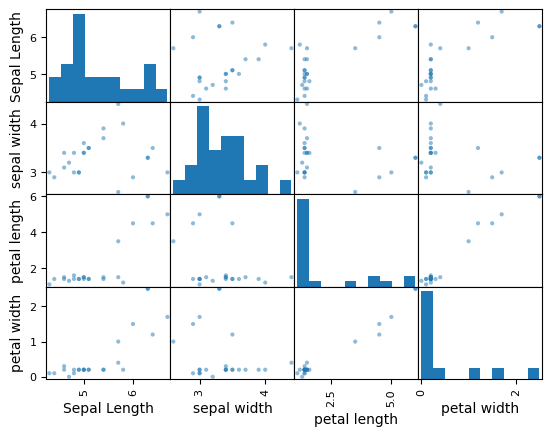

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [65]:
arrays = data.values
X = arrays[:,0:4]
Y = arrays[:,4]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=6,test_size=0.2)


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = []
models.append(("DTC",DecisionTreeClassifier()))
models.append(("LG",LogisticRegression(max_iter=1000)))
# model.append(("KNN",KNeighborsClassifier(n_neighbors=3)))
# model.append(('Naive_bayes',GaussianNB()))
models.append(("SVC",SVC(kernel='linear',random_state=6)))

for name,model in models:
    model.fit(X_train,Y_train)
    X_predict = model.predict(X_test)
    accuracy = accuracy_score(Y_test,X_predict)
    print(f"{name} accuracy: {accuracy} classification: {classification_report}")



DTC accuracy: 0.8 classification:                  precision    recall  f1-score   support

    Iris-setosa       0.80      1.00      0.89         4
Iris-versicolor       0.00      0.00      0.00         1

       accuracy                           0.80         5
      macro avg       0.40      0.50      0.44         5
   weighted avg       0.64      0.80      0.71         5

LG accuracy: 1.0 classification:                  precision    recall  f1-score   support

    Iris-setosa       0.80      1.00      0.89         4
Iris-versicolor       0.00      0.00      0.00         1

       accuracy                           0.80         5
      macro avg       0.40      0.50      0.44         5
   weighted avg       0.64      0.80      0.71         5

SVC accuracy: 1.0 classification:                  precision    recall  f1-score   support

    Iris-setosa       0.80      1.00      0.89         4
Iris-versicolor       0.00      0.00      0.00         1

       accuracy                     